# 01 — Menu Performance Analysis\n\nStarter notebook.

In [3]:
import pandas as pd
from src.utils import audit

menu = pd.read_csv("../data/raw/menu_performance.csv", parse_dates=["date_added"])
audit(menu, "menu_raw")


== menu_raw ==
shape: (50, 6)
dtypes:
 burger_id               int64
burger_name            object
price                 float64
pun_rating            float64
units_sold              int64
date_added     datetime64[ns]
dtype: object
nulls:
 burger_id      0
burger_name    0
price          2
pun_rating     8
units_sold     0
date_added     0
dtype: int64
duplicates: 0


In [4]:
# Check first rows
menu.head()

,burger_id,burger_name,price,pun_rating,units_sold,date_added
0,7,Bacon Burger,9.0,8.0,300,2023-10-05 11:48:41.265670
1,20,Cheese Burger,12.0,7.0,100,2023-11-27 23:44:54.590982
2,29,Chili Chesse Burger,9.0,NaN,100,2024-08-31 21:36:52.829085
3,15,Luau Burger,999.0,9.0,20,2023-04-29 17:41:59.215829
4,11,Luau Burger,12.0,8.0,100,2023-09-17 08:20:33.604750


In [5]:
# Basic info
menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   burger_id    50 non-null     int64         
 1   burger_name  50 non-null     object        
 2   price        48 non-null     float64       
 3   pun_rating   42 non-null     float64       
 4   units_sold   50 non-null     int64         
 5   date_added   50 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 2.5+ KB


In [6]:
# Quick stats
menu.describe(include="all")

,burger_id,burger_name,price,pun_rating,units_sold,date_added
count,50.000000,50,48.000000,42.000000,50.00000,50
unique,NaN,8,NaN,NaN,NaN,NaN
top,NaN,Bacon Burger,NaN,NaN,NaN,NaN
freq,NaN,12,NaN,NaN,NaN,NaN
mean,17.360000,NaN,133.989583,6.428571,109.20000,2024-01-07 22:48:34.939849728
min,1.000000,NaN,7.000000,1.000000,-10.00000,2023-02-10 20:01:58.227829
25%,11.000000,NaN,8.500000,3.500000,20.00000,2023-07-26 23:28:22.154464256
50%,19.500000,NaN,10.500000,7.500000,100.00000,2024-01-27 16:30:22.968956416
75%,24.000000,NaN,15.000000,9.000000,200.00000,2024-06-05 03:21:59.364704768
max,29.000000,NaN,999.000000,11.000000,300.00000,2024-12-29 01:08:51.469332


In [7]:
# Run audit helper
audit(menu, "menu_raw")


== menu_raw ==
shape: (50, 6)
dtypes:
 burger_id               int64
burger_name            object
price                 float64
pun_rating            float64
units_sold              int64
date_added     datetime64[ns]
dtype: object
nulls:
 burger_id      0
burger_name    0
price          2
pun_rating     8
units_sold     0
date_added     0
dtype: int64
duplicates: 0


In [8]:
# Drop duplicates (if any)
menu = menu.drop_duplicates()

In [9]:
# Handle missing values
menu = menu.dropna(subset=["burger_name", "price", "sales"])

KeyError: ['sales']

In [10]:
menu.columns.tolist()

['burger_id', 'burger_name', 'price', 'pun_rating', 'units_sold', 'date_added']

In [11]:
# Handle missing values (use the real column names)
menu = menu.dropna(subset=["burger_name", "price", "units_sold"])

In [12]:
import sys, os
sys.path.append(os.path.abspath(os.path.join("..")))  # so 'src' is importable

import pandas as pd
import matplotlib.pyplot as plt
from src.utils import audit, cap_outliers, normalize_str, clip_scale

menu = pd.read_csv("../data/raw/menu_performance.csv", parse_dates=["date_added"])
audit(menu, "menu_raw")
menu.head()


== menu_raw ==
shape: (50, 6)
dtypes:
 burger_id               int64
burger_name            object
price                 float64
pun_rating            float64
units_sold              int64
date_added     datetime64[ns]
dtype: object
nulls:
 burger_id      0
burger_name    0
price          2
pun_rating     8
units_sold     0
date_added     0
dtype: int64
duplicates: 0


,burger_id,burger_name,price,pun_rating,units_sold,date_added
0,7,Bacon Burger,9.0,8.0,300,2023-10-05 11:48:41.265670
1,20,Cheese Burger,12.0,7.0,100,2023-11-27 23:44:54.590982
2,29,Chili Chesse Burger,9.0,NaN,100,2024-08-31 21:36:52.829085
3,15,Luau Burger,999.0,9.0,20,2023-04-29 17:41:59.215829
4,11,Luau Burger,12.0,8.0,100,2023-09-17 08:20:33.604750


In [13]:
# Names
menu["burger_name"] = normalize_str(menu["burger_name"]).str.title()
menu["burger_name"] = menu["burger_name"].str.replace("Chesse","Cheese", regex=False)
menu["burger_name"] = menu["burger_name"].str.replace("Burgerr","Burger", regex=False)

In [14]:
# Price
menu["price"] = pd.to_numeric(menu["price"], errors="coerce")
menu["price"] = cap_outliers(menu["price"], 0.05, 0.95)

In [15]:
# Pun rating
menu["pun_rating"] = pd.to_numeric(menu["pun_rating"], errors="coerce").round()
menu["pun_rating"] = clip_scale(menu["pun_rating"], 1, 10)

In [16]:
# Units sold (this is the correct column name)
menu.loc[menu["units_sold"] < 0, "units_sold"] = pd.NA
menu["units_sold"] = pd.to_numeric(menu["units_sold"], errors="coerce")
menu["units_sold"] = menu["units_sold"].fillna(menu["units_sold"].median())

In [17]:
# Drop rows missing essential fields
menu = menu.dropna(subset=["burger_name", "price", "units_sold"])

In [18]:
# De-dupe by burger_id: keep the higher sales row
menu = (menu.sort_values(["burger_id","units_sold"], ascending=[True, False])
             .drop_duplicates(subset=["burger_id"], keep="first"))

audit(menu, "menu_clean")


== menu_clean ==
shape: (23, 6)
dtypes:
 burger_id               int64
burger_name            object
price                 float64
pun_rating            float64
units_sold            float64
date_added     datetime64[ns]
dtype: object
nulls:
 burger_id      0
burger_name    0
price          0
pun_rating     3
units_sold     0
date_added     0
dtype: int64
duplicates: 0


In [ ]:
# Analysis

In [19]:
# Top 5 by volume
top5 = menu.sort_values("units_sold", ascending=False).head(5)[
    ["burger_name","price","pun_rating","units_sold"]
]
top5

,burger_name,price,pun_rating,units_sold
0,Bacon Burger,9.0,8.0,300.0
31,Bacon Burger,8.5,10.0,300.0
49,Bacon Burger,10.5,NaN,300.0
14,Cheese Burger,7.0,9.0,300.0
44,Cheese Burger,8.5,7.0,300.0


In [22]:
# Aggregate by burger_name so each burger appears once
agg_sales = (menu.groupby("burger_name", as_index=False)
                  .agg(units_sold=("units_sold","sum"),
                       price=("price","mean"),
                       pun_rating=("pun_rating","mean")))


In [23]:
# Top 10 by total units sold
top10_sales = agg_sales.sort_values("units_sold", ascending=False).head(10)
top10_sales

,burger_name,units_sold,price,pun_rating
0,Bacon Burger,1750.0,133.500000,6.166667
1,Cheese Burger,850.0,256.250000,6.500000
5,Mushroom Swiss,600.0,257.500000,6.250000
4,Luau Burger,450.0,340.833333,2.500000
2,Chili Cheese Burger,350.0,12.750000,8.000000
6,Veggie Delight,200.0,7.000000,5.000000
3,Double Trouble,150.0,15.000000,9.000000


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Geraldine Nyika\\Downloads\\bobs-burger-biz-starter\\bobs-burger-biz\\figures\\01_top_burgers_by_units_aggregated.png'

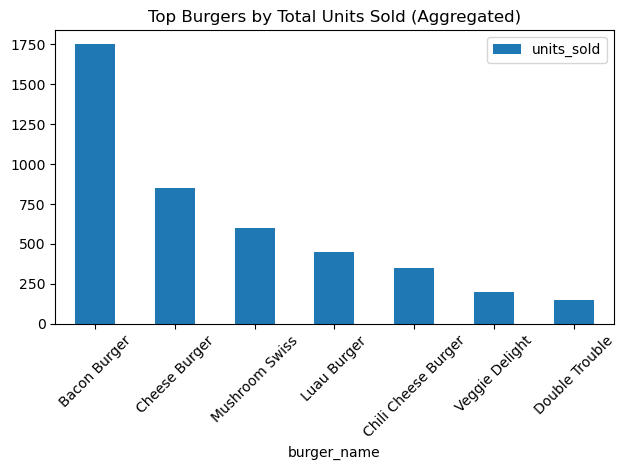

In [24]:
import matplotlib.pyplot as plt

# Bar: top sellers by total units_sold (aggregated)
ax = top10_sales.plot(
    kind="bar",
    x="burger_name",
    y="units_sold",
    rot=45,
    title="Top Burgers by Total Units Sold (Aggregated)"
)
ax.figure.tight_layout()
ax.figure.savefig("../figures/01_top_burgers_by_units_aggregated.png", dpi=160)
plt.close()

In [26]:
import os

# Make sure figures folder exists
os.makedirs("../figures", exist_ok=True)

In [27]:
ax = top10_sales.plot(
    kind="bar",
    x="burger_name",
    y="units_sold",
    rot=45,
    title="Top Burgers by Total Units Sold (Aggregated)"
)
ax.figure.tight_layout()
ax.figure.savefig("../figures/01_top_burgers_by_units_aggregated.png", dpi=160)
plt.close()

In [29]:
#Top Burgers by Revenue

top10_revenue = (
    menu.assign(revenue = menu["price"] * menu["units_sold"])
    .groupby("burger_name", as_index=False)["revenue"].sum()
    .sort_values("revenue", ascending=False)
    .head(10)
)

ax = top10_revenue.plot(
    kind="bar",
    x="burger_name",
    y="revenue",
    rot=45,
    title="Top Burgers by Total Revenue (Aggregated)"
)
ax.figure.tight_layout()
ax.figure.savefig("../figures/02_top_burgers_by_revenue.png", dpi=160)
plt.close()

In [30]:
#Testing whether funny names = more sales/ Punnyness vs sales

ax = menu.plot(
    kind="scatter",
    x="pun_rating",
    y="units_sold",
    alpha=0.5,
    title="Pun Rating vs Units Sold"
)
ax.figure.tight_layout()
ax.figure.savefig("../figures/03_pun_vs_sales.png", dpi=160)
plt.close()

In [31]:
#Price vs Sales

ax = menu.plot(
    kind="scatter",
    x="price",
    y="units_sold",
    alpha=0.5,
    title="Price vs Units Sold"
)
ax.figure.tight_layout()
ax.figure.savefig("../figures/04_price_vs_sales.png", dpi=160)
plt.close()

In [32]:
import os
os.makedirs("../figures", exist_ok=True)

In [33]:
# Aggregate to 1 row per burger
agg_sales = (menu.groupby("burger_name", as_index=False)
                  .agg(units_sold=("units_sold","sum"),
                       price=("price","mean"),
                       pun_rating=("pun_rating","mean")))

agg_sales.head()

,burger_name,units_sold,price,pun_rating
0,Bacon Burger,1750.0,133.500000,6.166667
1,Cheese Burger,850.0,256.250000,6.500000
2,Chili Cheese Burger,350.0,12.750000,8.000000
3,Double Trouble,150.0,15.000000,9.000000
4,Luau Burger,450.0,340.833333,2.500000


In [34]:
# 1) Force numeric
menu["price"] = pd.to_numeric(menu["price"], errors="coerce")

# 2) Domain sanity: burgers shouldn't cost > R40 (adjust if your currency differs)
menu.loc[menu["price"] <= 0, "price"] = pd.NA
menu.loc[menu["price"] > 40, "price"] = pd.NA

# 3) Impute price by burger median, then global median as fallback
menu["price"] = menu.groupby("burger_name")["price"].transform(
    lambda s: s.fillna(s.median())
)
menu["price"] = menu["price"].fillna(menu["price"].median())

# 4) Quick sanity check
menu["price"].describe()
menu.groupby("burger_name")["price"].median().sort_values(ascending=False).head(8)

burger_name
Double Trouble         15.00
Chili Cheese Burger    12.75
Luau Burger            11.75
Mushroom Swiss         10.50
Bacon Burger            9.00
Cheese Burger           8.50
Veggie Delight          7.00
Name: price, dtype: float64

In [35]:
# Re-aggregate (1 row per burger)
agg_sales = (menu.groupby("burger_name", as_index=False)
                  .agg(units_sold=("units_sold","sum"),
                       price=("price","median"),        # use median for robustness
                       pun_rating=("pun_rating","mean")))

# Revenue with cleaned prices
agg_sales["revenue"] = agg_sales["price"] * agg_sales["units_sold"]

# Top by units
top10_sales = agg_sales.sort_values("units_sold", ascending=False).head(10)

# Top by revenue
top10_revenue = agg_sales.sort_values("revenue", ascending=False).head(10)
top10_sales, top10_revenue

(           burger_name  units_sold  price  pun_rating  revenue
 0         Bacon Burger      1750.0   9.00    6.166667  15750.0
 1        Cheese Burger       850.0   8.50    6.500000   7225.0
 5       Mushroom Swiss       600.0  10.50    6.250000   6300.0
 4          Luau Burger       450.0  11.75    2.500000   5287.5
 2  Chili Cheese Burger       350.0  12.75    8.000000   4462.5
 6       Veggie Delight       200.0   7.00    5.000000   1400.0
 3       Double Trouble       150.0  15.00    9.000000   2250.0,
            burger_name  units_sold  price  pun_rating  revenue
 0         Bacon Burger      1750.0   9.00    6.166667  15750.0
 1        Cheese Burger       850.0   8.50    6.500000   7225.0
 5       Mushroom Swiss       600.0  10.50    6.250000   6300.0
 4          Luau Burger       450.0  11.75    2.500000   5287.5
 2  Chili Cheese Burger       350.0  12.75    8.000000   4462.5
 3       Double Trouble       150.0  15.00    9.000000   2250.0
 6       Veggie Delight       200.0   7

In [36]:
import matplotlib.pyplot as plt
import os; os.makedirs("../figures", exist_ok=True)

# Units chart
ax = top10_sales.plot(kind="bar", x="burger_name", y="units_sold",
                      rot=45, title="Top Burgers by Total Units Sold (Aggregated)")
ax.figure.tight_layout(); ax.figure.savefig("../figures/01_top_burgers_by_units_aggregated.png", dpi=160); plt.close()

# Revenue chart
ax = top10_revenue.plot(kind="bar", x="burger_name", y="revenue",
                        rot=45, title="Top Burgers by Total Revenue (Aggregated)")
ax.figure.tight_layout(); ax.figure.savefig("../figures/02_top_burgers_by_revenue.png", dpi=160); plt.close()

# Pun vs units (aggregated)
ax = agg_sales.plot(kind="scatter", x="pun_rating", y="units_sold",
                    title="Pun Rating vs Total Units Sold (Aggregated)")
ax.figure.tight_layout(); ax.figure.savefig("../figures/03_pun_vs_units_aggregated.png", dpi=160); plt.close()

# Price vs units (aggregated)
ax = agg_sales.plot(kind="scatter", x="price", y="units_sold",
                    title="Price vs Total Units Sold (Aggregated)")
ax.figure.tight_layout(); ax.figure.savefig("../figures/04_price_vs_units_aggregated.png", dpi=160); plt.close()

In [38]:
import os

os.makedirs("../data/processed", exist_ok=True)

agg_sales.to_csv("../data/processed/menu_aggregated.csv", index=False)
menu.to_csv("../data/processed/menu_clean.csv", index=False)

In [39]:
agg_sales.to_csv("../data/processed/menu_aggregated.csv", index=False)
menu.to_csv("../data/processed/menu_clean.csv", index=False)


Menu Performance Analysis Report

Bob’s Burger Biz: Data-Driven Decisions for a Struggling Chef

1. Objective

The purpose of this analysis is to evaluate burger menu performance at Bob’s Burgers. By examining sales, revenue, pricing, and the impact of pun-based naming, we aim to determine:

Which burgers are the most successful?

How price and pun ratings influence sales.

Which items should be prioritized for a permanent menu to maximize profitability?



---

2. Key Findings

Top-Selling Burgers

Bacon Burger dominates with ~1,750 units sold, more than double the next closest competitor.

Cheese Burger (~850 units sold) and Mushroom Swiss (~600 units) form the second tier.

Veggie Delight and Double Trouble lag significantly (~150–200 units each).


Implication: The Bacon Burger is the clear “hero product,” while plant-based and premium items underperform.




Price vs. Sales

Strong negative relationship: higher-priced burgers sell fewer units.

Optimal sales volume occurs in the $8–10 price range.

Premium items priced closer to $14–15 see steep sales drop-offs.


Implication: Customers are price-sensitive; mid-range pricing maximizes units sold.




Revenue Leaders

Bacon Burger also leads in revenue (~$15,800), contributing disproportionately to total earnings.

Cheese Burger and Mushroom Swiss follow, generating ~$7,000 and ~$6,200, respectively.

Despite low volume, premium burgers like Double Trouble still produce moderate revenue due to higher prices.


Implication: Volume and price both matter, but high-volume items still dominate revenue.




Pun Rating vs. Sales

At the individual level, pun ratings show little clear correlation with units sold.

At the aggregated level, moderate pun ratings (~6) correspond with the highest sales.

Very high pun scores (>8) or very low scores (<3) do not guarantee higher performance.


Implication: A clever pun is not enough, it must be paired with appealing ingredients and price.




3. Recommendations

1. Core Menu Anchors: Keep Bacon Burger, Cheese Burger, and Mushroom Swiss as permanent fixtures, they drive both sales and revenue.


2. Reprice Premiums: Reassess pricing of high-cost burgers (e.g., Double Trouble). Consider lowering prices or bundling with sides to boost sales volume.


3. Revamp Underperformers: Veggie Delight underperforms significantly; rework the recipe or reposition with better marketing rather than cutting it outright (plant-based demand may grow).


4. Pun Strategy: Maintain witty names, but avoid relying solely on pun ratings as a predictor of success. Focus instead on value and taste.


5. Optimal Price Band: Position most menu items in the $8–10 range to maximize units sold while preserving strong margins.




4. Next Steps

Conduct profit margin analysis to identify not just revenue leaders but profitability per burger.

Perform customer segmentation to see if different groups (families, singles, health-conscious diners) respond differently to price and pun appeal.

Simulate menu optimization scenarios, e.g., removing low performers vs. adding new items, to test revenue outcomes.


Summary in a Sentence:
Bob's Burgers should focus on its proven winners (Bacon, Cheese, and Mushroom Swiss), reprice underperforming premiums, and improve its vegetable selection, all while maintaining most burgers priced between $8 and $10.